# Black Body Radiation
Authors:  A + B

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Introduction


some facts about Black Body radiation

# Wien's displacement law

/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


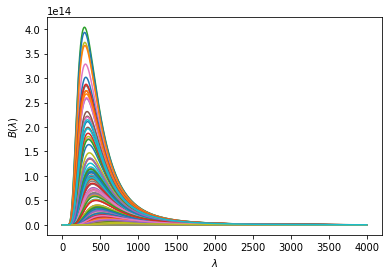

In [18]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 4e-6, 1e-10) 

#generate 10 temperatures

intensity=[]
Temp=[]
ntemp=200
for i in range(ntemp):
    T = np.random.uniform(1000,10000,1)[0]
    B = planck(wavelengths, T)
    intensity.append(B)
    Temp.append(T)
    plt.plot(wavelengths*1e9, B) 
    plt.ylabel(r'$B(\lambda)$')
    plt.xlabel(r'$\lambda$')


# show the plot
plt.show()

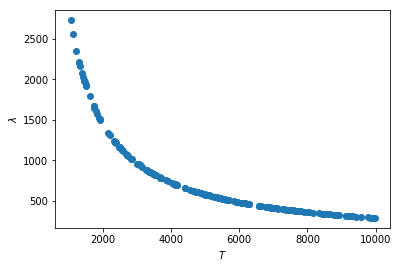

In [23]:
#get maximum
lmax=[]
Tmax=[]
for i in range(ntemp):
    l = np.argmax(intensity[i])
    lmax.append(wavelengths[l]*1e9)
    Tmax.append(Temp[i])

    
plt.scatter(np.array(Tmax),np.array(lmax))
plt.xlabel(r'$T$')
plt.ylabel(r'$\lambda$')
plt.show()

# Measure the Temperature of the sun


<img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2000/11/soho_image_of_the_sun/9227898-5-eng-GB/SOHO_image_of_the_Sun_node_full_image_2.gif" width="40%">


<div style="text-align: justify"> 
<p>
The International Space Station (ISS) has tracked our sun to measure its energy for almost a decade now. 
In particular the Solspec instrument, part of the solar package aboard the ISS has measured the energy at different wavelength in the optical spectrum to high accuracy. Launched together with the European Columbus space laboratory in 2008 it has tracked the Sun until it was shut down this year. 
</p>
<p>
The Solspec instrument provides us with a very accurate reference measurement of the spectrum of our sun.
</p>
</br>
In the following you should use this spectrum and the results of the Wien's displacement law to estimate the temperature of our sun.  

</div>


450.65
2.25681782


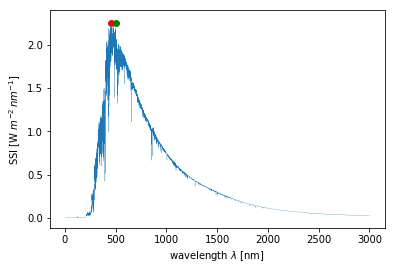

In [57]:
x,y=np.loadtxt('./data/solar_reference_spectrum_2018.dat', usecols=[0,1], unpack=True)

imax=np.argmax(y)
print(x[imax])
print(y[imax])

plt.plot(x,y,lw=0.25)
plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel(r'SSI [W $m^{-2}\, nm^{-1}$]')
plt.scatter(450,2.25,color='red')
plt.scatter(500,2.25,color='green')
plt.show()

In [52]:
T_sun = Tmax[10]*lmax[10]/500.00

In [47]:
print(T_sun)

5801.642579597854
